In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Execute load_data.py to generate the qsvr_data.csv file
!python load_data.py

# Load the combined data from qsvr_data.csv
all_data_df = pd.read_csv('output/extracted_data/qsvr_data.csv')

print("Combined DataFrame:")
# Display the combined dataframe 
all_data_df.head()

Condition counts for participant PAT002:
WalkAllo: 8
Teleport: 8
WalkEgo: 8

Condition counts for participant PAT004:
WalkAllo: 8
Teleport: 8
WalkEgo: 8

Condition counts for participant PAT005:
WalkAllo: 8
Teleport: 8
WalkEgo: 8

Condition counts for participant PAT006:
WalkAllo: 8
Teleport: 8
WalkEgo: 8

PAT002: data saved to ./output\extracted_data\positive\PAT002_data.csv
PAT004: data saved to ./output\extracted_data\positive\PAT004_data.csv
PAT005: data saved to ./output\extracted_data\positive\PAT005_data.csv
PAT006: data saved to ./output\extracted_data\positive\PAT006_data.csv
Condition counts for participant PAT001:
WalkAllo: 8
Teleport: 8
WalkEgo: 8

Condition counts for participant PAT003:
WalkAllo: 8
Teleport: 8
WalkEgo: 8

Condition counts for participant PAT007:
WalkAllo: 8
Teleport: 8
WalkEgo: 8

PAT001: data saved to ./output\extracted_data\negative\PAT001_data.csv
PAT003: data saved to ./output\extracted_data\negative\PAT003_data.csv
PAT007: data saved to ./output\extr

,participant_id,participant_numeric_id,status,block_num,trial_type,trial_num,object_id,real_x,real_z,placed_x,placed_z,start_time,end_time,distance,duration,configurator_line,object_configuration_type
0,PAT002,2,positive,1,Teleport,1,107,2.35,-2.59,6.511,1.208,1902.721,1935.084,5.634,32.363,17,open
1,PAT002,2,positive,1,Teleport,1,106,4.29,-6.79,5.416,0.163,1938.172,1952.677,7.044,14.505,17,open
2,PAT002,2,positive,1,Teleport,1,95,-0.11,-6.76,2.439,0.667,1955.764,1974.867,7.852,19.103,17,open
3,PAT002,2,positive,1,Teleport,1,100,8.17,-1.89,1.641,0.488,1977.954,1983.374,6.949,5.420,17,open
4,PAT002,2,positive,1,WalkAllo,2,75,7.38,-5.92,8.403,0.509,2066.970,2073.178,6.510,6.208,18,open


In [2]:
# Calculate the average distance for each participant and trial number
average_distance_temp = all_data_df.groupby(['participant_id', 'trial_num'])['distance'].mean().reset_index()

# Rename the 'distance' column to 'average_distance' for clarity
average_distance_temp = average_distance_temp.rename(columns={'distance': 'average_distance'})

# Merge the trial_type and label columns back into the average_distance_df
average_distance_df = pd.merge(average_distance_temp, all_data_df[['participant_id', 'trial_num', 'trial_type', 'status']].drop_duplicates(), on=['participant_id', 'trial_num'])

# Display the average distance dataframe
print("\nAverage Distance DataFrame:")
print(average_distance_df.head())


Average Distance DataFrame:
  participant_id  trial_num  average_distance trial_type    status
0         PAT001          1           1.68525   WalkAllo  negative
1         PAT001          2           1.44225   WalkAllo  negative
2         PAT001          3           3.17950    WalkEgo  negative
3         PAT001          4           1.33075    WalkEgo  negative
4         PAT001          5           2.77875   Teleport  negative


In [3]:
# Calculate the average distance for each participant per trial type
average_distance_per_trial_type = average_distance_df.groupby(['participant_id', 'trial_type'])['average_distance'].mean().reset_index()

# Merge the label column back into the average_distance_per_trial_type
average_distance_per_trial_type = pd.merge(average_distance_per_trial_type, all_data_df[['participant_id', 'status']].drop_duplicates(), on='participant_id')

# Display the final average distance dataframe
print("\nAverage Distance per Trial Type DataFrame:")
print(average_distance_per_trial_type.head())


Average Distance per Trial Type DataFrame:
  participant_id trial_type  average_distance    status
0         PAT001   Teleport          2.815219  negative
1         PAT001   WalkAllo          2.463563  negative
2         PAT001    WalkEgo          1.743969  negative
3         PAT002   Teleport          3.556375  positive
4         PAT002   WalkAllo          4.049125  positive


# Plotting different values for csf status

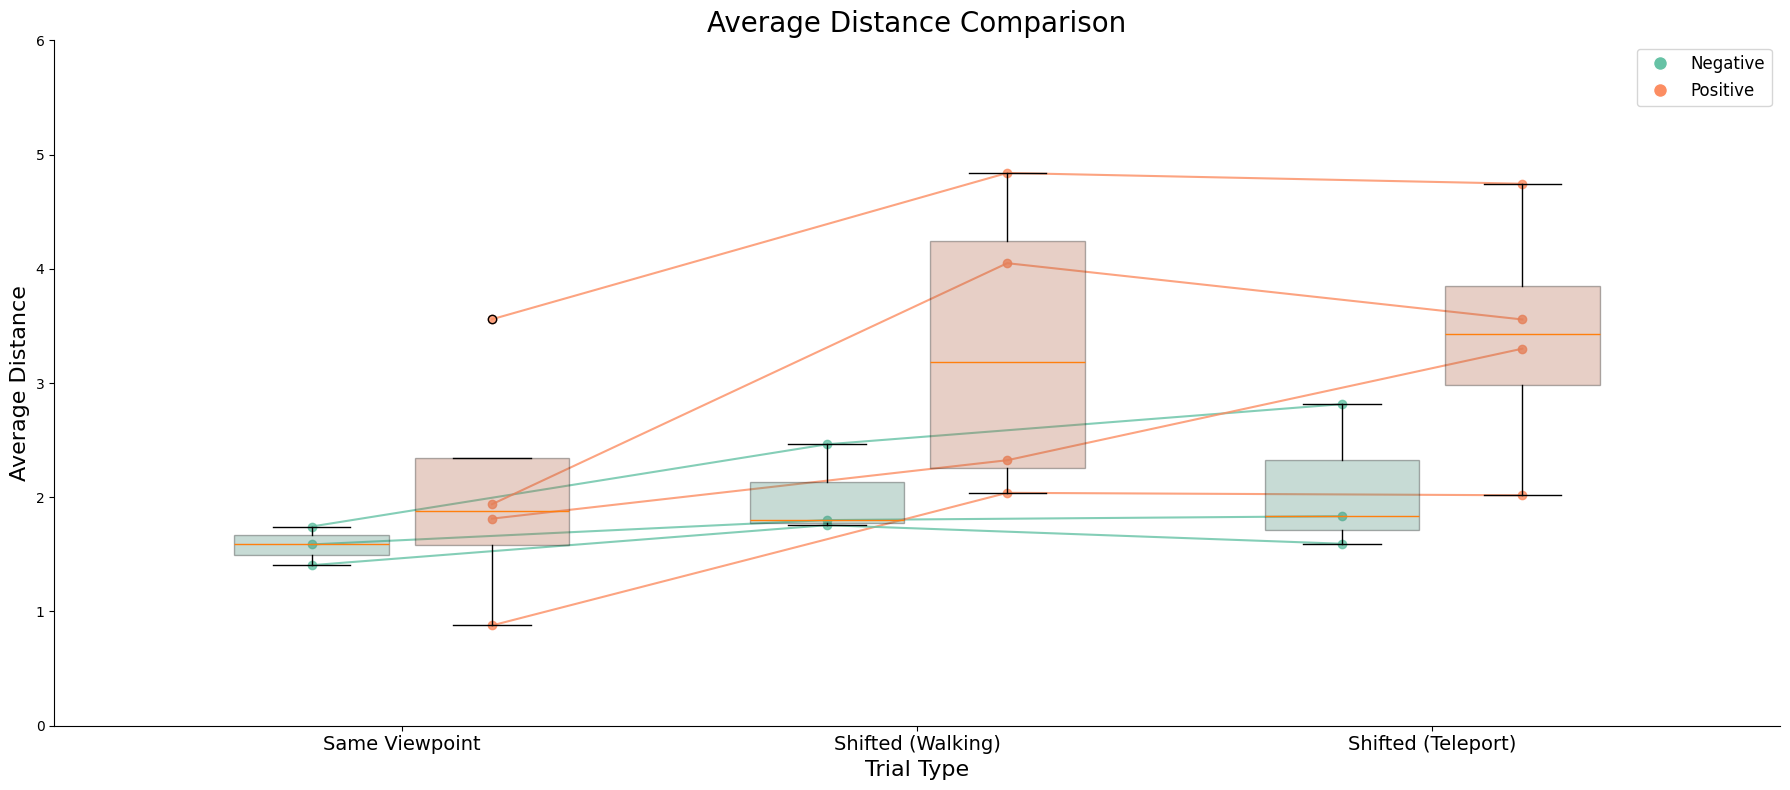

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8))

trial_types = ['WalkEgo', 'WalkAllo', 'Teleport']
titles = ['Same Viewpoint', 'Shifted (Walking)', 'Shifted (Teleport)']

# Create a dictionary to map trial types to x-coordinates
trial_type_to_x = {trial_type: i for i, trial_type in enumerate(trial_types)}

# Create a color palette for the status
status_palette = sns.color_palette("Set2", len(average_distance_per_trial_type['status'].unique()))
darkening_factor = 0.7  # Adjust this value between 0 and 1 (smaller = darker)
darker_status_palette = [(r*darkening_factor, g*darkening_factor, b*darkening_factor) 
                 for r, g, b in sns.color_palette("Set2", len(average_distance_per_trial_type['status'].unique()))]

# Define the separation between boxplots
separation = 0.35

# Plot the data points for each participant, aligned with their respective boxplots
for _, participant_data in average_distance_per_trial_type.groupby('participant_id'):
    participant_data_sorted = participant_data.sort_values('trial_type')
    x = [trial_type_to_x[trial_type] + (separation/2 if participant_data_sorted['status'].iloc[0] == 'positive' else -separation/2) 
         for trial_type in participant_data_sorted['trial_type']]
    y = participant_data_sorted['average_distance']
    status = participant_data_sorted['status'].iloc[0]
    color = status_palette[1] if status == 'positive' else status_palette[0]
    ax.plot(x, y, '-o', color=color, alpha=0.8)

# Create separate DataFrames for negative and positive groups
negative_df = average_distance_per_trial_type[average_distance_per_trial_type['status'] == 'negative']
positive_df = average_distance_per_trial_type[average_distance_per_trial_type['status'] == 'positive']

# Calculate the positions for negative and positive groups based on their unique trial types
negative_positions = [trial_type_to_x[trial_type] - separation/2 for trial_type in negative_df['trial_type'].unique()]
positive_positions = [trial_type_to_x[trial_type] + separation/2 for trial_type in positive_df['trial_type'].unique()]

# Create separate box plots for negative and positive groups using ax.boxplot
for trial_type, position in zip(negative_df['trial_type'].unique(), negative_positions):
    data = negative_df[negative_df['trial_type'] == trial_type]['average_distance']
    ax.boxplot(data, positions=[position], widths=0.3, patch_artist=True, 
               boxprops=dict(facecolor=darker_status_palette[0], alpha=0.3))

for trial_type, position in zip(positive_df['trial_type'].unique(), positive_positions):
    data = positive_df[positive_df['trial_type'] == trial_type]['average_distance']
    ax.boxplot(data, positions=[position], widths=0.3, patch_artist=True, 
               boxprops=dict(facecolor=darker_status_palette[1], alpha=0.3))

# Set plot title and labels
ax.set_title('Average Distance Comparison', fontsize=20)
ax.set_xlabel('Trial Type', fontsize=16)
ax.set_ylabel('Average Distance', fontsize=16)

# Set the x-tick labels
ax.set_xticks(range(len(trial_types)))
ax.set_xticklabels(titles, fontsize=14)

# Set the y-axis to start from zero
ax.set_ylim(0, 6)

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative',
                              markerfacecolor=status_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive',
                              markerfacecolor=status_palette[1], markersize=10)]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

visualization_output_dir = os.path.join(os.getcwd(), 'output', 'group_visualization')
os.makedirs(visualization_output_dir, exist_ok=True)
filename_pdf = os.path.join(visualization_output_dir, "average_distance_by_trial_types.png")

plt.savefig(filename_pdf, format='png', dpi=600, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()

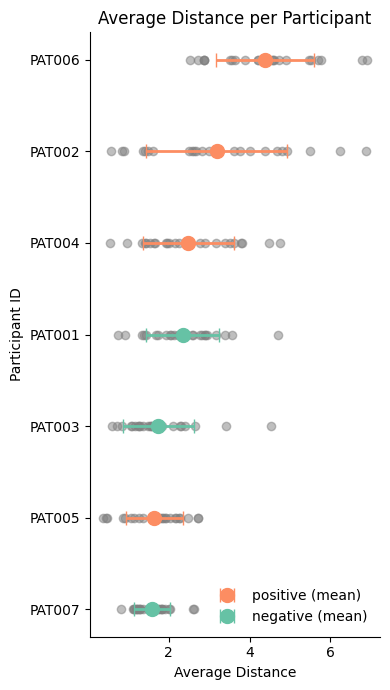

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate means and sort participants
trial_means = all_data_df.groupby(['participant_id', 'trial_num'])['distance'].mean().reset_index()
overall_means = trial_means.groupby('participant_id')['distance'].mean()
sorted_participant_ids = overall_means.sort_values().index.tolist()

# Get participant statuses
participant_status = all_data_df[['participant_id', 'status']].drop_duplicates()

# Calculate statistics per participant
participant_stats = (trial_means.groupby('participant_id')['distance']
                    .agg(['mean', 'std'])
                    .merge(participant_status, on='participant_id'))

# Merge trial means with participant status
trial_means = trial_means.merge(participant_status, on='participant_id')

# Create plot
fig, ax = plt.subplots(figsize=(4, 7))

# Set y-axis ticks and labels
ax.set_yticks(range(len(sorted_participant_ids)))
ax.set_yticklabels(sorted_participant_ids)

# Define color palette
status_palette = sns.color_palette("Set2", 2)[::-1]

# Plot trial means as gray dots
for participant_id in sorted_participant_ids:
    participant_trials = trial_means[trial_means['participant_id'] == participant_id]
    ax.scatter(participant_trials['distance'], 
              [sorted_participant_ids.index(participant_id)] * len(participant_trials), 
              alpha=0.5, color='gray')

# Plot means with error bars for each status
for status, color in zip(['positive', 'negative'], status_palette):
    status_data = participant_stats[participant_stats['status'] == status]
    y_positions = [sorted_participant_ids.index(pid) for pid in status_data['participant_id']]
    ax.errorbar(status_data['mean'], y_positions, xerr=status_data['std'], fmt='o', 
                color=color, label=f'{status} (mean)', markersize=10, capsize=5, elinewidth=2)

# Set labels and title
ax.set_xlabel('Average Distance')
ax.set_ylabel('Participant ID')
ax.set_title('Average Distance per Participant')
ax.legend(loc='lower right',frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

visualization_output_dir = os.path.join(os.getcwd(), 'output', 'group_visualization')
os.makedirs(visualization_output_dir, exist_ok=True)
filename_pdf = os.path.join(visualization_output_dir, "average_distance_ranked_by_participant.png")

plt.savefig(filename_pdf, format='png', dpi=600, bbox_inches='tight', transparent=True)

plt.show()

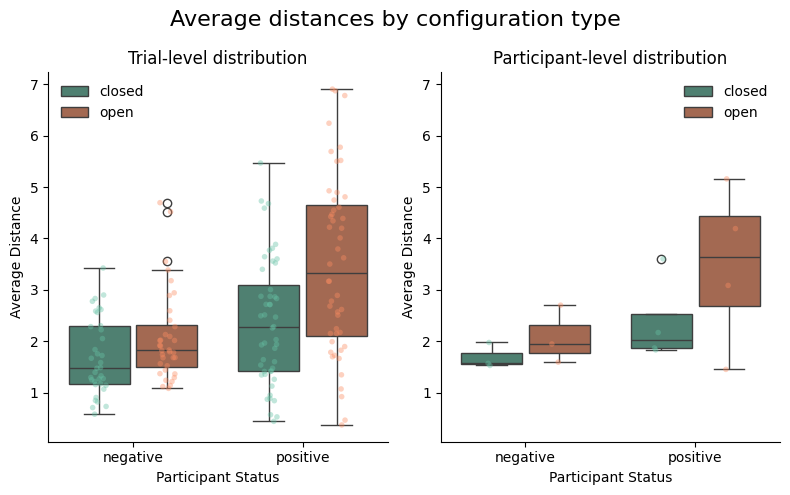

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a color palette for the status
status_palette = sns.color_palette("Set2", len(average_distance_per_trial_type['status'].unique()))
darkening_factor = 0.7  # Adjust this value between 0 and 1 (smaller = darker)
darker_status_palette = [(r*darkening_factor, g*darkening_factor, b*darkening_factor) 
                 for r, g, b in sns.color_palette("Set2", len(average_distance_per_trial_type['status'].unique()))]

config_order = ['closed', 'open']
config_colors = {'closed': darker_status_palette[0], 'open': darker_status_palette[1]}
dot_colors = {'closed': status_palette[0], 'open': status_palette[1]}

# Calculate both trial-level and participant-level means
trial_means = (all_data_df.groupby(['participant_id', 'trial_num', 'status', 'object_configuration_type'])['distance']
               .mean()
               .reset_index())

participant_means = (all_data_df.groupby(['participant_id', 'status', 'object_configuration_type'])['distance']
                    .mean()
                    .reset_index())

# Create visualization with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
# Add a main title to the entire figure
fig.suptitle('Average distances by configuration type', 
             fontsize=16)

# First subplot (trial-level data)
sns.boxplot(data=trial_means, 
            x='status', 
            y='distance',
            hue='object_configuration_type',
            hue_order=config_order,
            gap=0.1,
            palette=config_colors,
            ax=ax1)

sns.stripplot(data=trial_means,
             x='status',
             y='distance',
             hue='object_configuration_type',
             hue_order=config_order,
             palette=dot_colors,
             dodge=True,
             alpha=0.4,
             size=4,
             legend=False,
             ax=ax1)

ax1.legend(title='',frameon=False)
ax1.set_title('Trial-level distribution')
ax1.set_xlabel('Participant Status')
ax1.set_ylabel('Average Distance')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Second subplot (participant-level averages)
sns.boxplot(data=participant_means, 
            x='status', 
            y='distance',
            hue='object_configuration_type',
            hue_order=config_order,
            gap=0.1,
            palette=config_colors,
            ax=ax2)

sns.stripplot(data=participant_means,
             x='status',
             y='distance',
             hue='object_configuration_type',
             hue_order=config_order,
             palette=dot_colors,
             dodge=True,
             alpha=0.4,
             size=4,
             legend=False,
             ax=ax2)

ax2.legend(title='',frameon=False)
ax2.set_title('Participant-level distribution')
ax2.set_xlabel('Participant Status')
ax2.set_ylabel('Average Distance')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Ensure the y-axes have the same scale
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.tight_layout()

visualization_output_dir = os.path.join(os.getcwd(), 'output', 'group_visualization')
os.makedirs(visualization_output_dir, exist_ok=True)
filename_pdf = os.path.join(visualization_output_dir, "average_distance_by_object_configuration.png")

plt.savefig(filename_pdf, format='png', dpi=600, bbox_inches='tight', transparent=True)

plt.show()

C:\Users\acastegnaro\AppData\Local\Temp\ipykernel_26568\875473453.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([trial_type_labels[t] for t in trial_order])
C:\Users\acastegnaro\AppData\Local\Temp\ipykernel_26568\875473453.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([trial_type_labels[t] for t in trial_order])


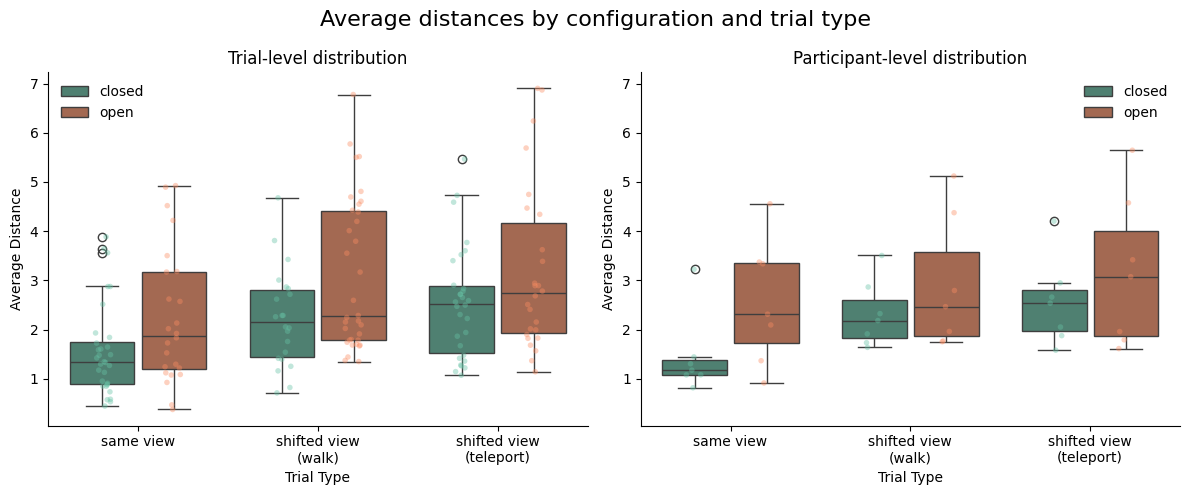

In [6]:
# trial-level means (since each trial has 4 objects)
trial_means = (all_data_df.groupby(['participant_id', 'trial_num', 
                                   'object_configuration_type', 'trial_type'])['distance']
               .mean()
               .reset_index())

# Then calculate participant-level means
participant_means = (trial_means.groupby(['participant_id', 'object_configuration_type', 'trial_type'])['distance']
                    .mean()
                    .reset_index())

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Average distances by configuration and trial type', fontsize=16)

# Create color palette
status_palette = sns.color_palette("Set2", 2)
darkening_factor = 0.7
darker_status_palette = [(r*darkening_factor, g*darkening_factor, b*darkening_factor) 
                        for r, g, b in status_palette]

config_order = ['closed', 'open']
trial_type_labels = {
    'WalkEgo': 'same view',
    'WalkAllo': 'shifted view\n(walk)',
    'Teleport': 'shifted view\n(teleport)'
}

trial_order = ['WalkEgo', 'WalkAllo', 'Teleport']
config_colors = {'closed': darker_status_palette[0], 'open': darker_status_palette[1]}
dot_colors = {'closed': status_palette[0], 'open': status_palette[1]}

# First subplot (trial-level data)
sns.boxplot(data=trial_means, 
            x='trial_type',
            y='distance',
            hue='object_configuration_type',
            order=trial_order,
            hue_order=config_order,
            gap=0.1,
            palette=config_colors,
            ax=ax1)

sns.stripplot(data=trial_means,
             x='trial_type',
             y='distance',
             hue='object_configuration_type',
             order=trial_order,
             hue_order=config_order,
             palette=dot_colors,
             dodge=True,
             alpha=0.4,
             size=4,
             legend=False,
             ax=ax1)

ax1.set_xticklabels([trial_type_labels[t] for t in trial_order])
ax1.legend(frameon=False)
ax1.set_title('Trial-level distribution')
ax1.set_xlabel('Trial Type')
ax1.set_ylabel('Average Distance')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


# Second subplot (participant-level averages)
sns.boxplot(data=participant_means, 
            x='trial_type',
            y='distance',
            hue='object_configuration_type',
            order=trial_order,
            hue_order=config_order,
            gap=0.1,
            palette=config_colors,
            ax=ax2)

sns.stripplot(data=participant_means,
             x='trial_type',
             y='distance',
             hue='object_configuration_type',
             order=trial_order,
             hue_order=config_order,
             palette=dot_colors,
             dodge=True,
             alpha=0.4,
             size=4,
             legend=False,
             ax=ax2)

ax2.set_xticklabels([trial_type_labels[t] for t in trial_order])
ax2.legend(frameon=False)
ax2.set_title('Participant-level distribution')
ax2.set_xlabel('Trial Type')
ax2.set_ylabel('Average Distance')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Ensure the y-axes have the same scale
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.tight_layout()

# Save the figure
visualization_output_dir = os.path.join(os.getcwd(), 'output', 'group_visualization')
os.makedirs(visualization_output_dir, exist_ok=True)
filename = os.path.join(visualization_output_dir, "average_distance_by_configuration_and_trial_type.png")
plt.savefig(filename, format='png', dpi=600, bbox_inches='tight', transparent=True)

plt.show()

C:\Users\acastegnaro\AppData\Local\Temp\ipykernel_26568\920865282.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_labels)
C:\Users\acastegnaro\AppData\Local\Temp\ipykernel_26568\920865282.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(x_labels)


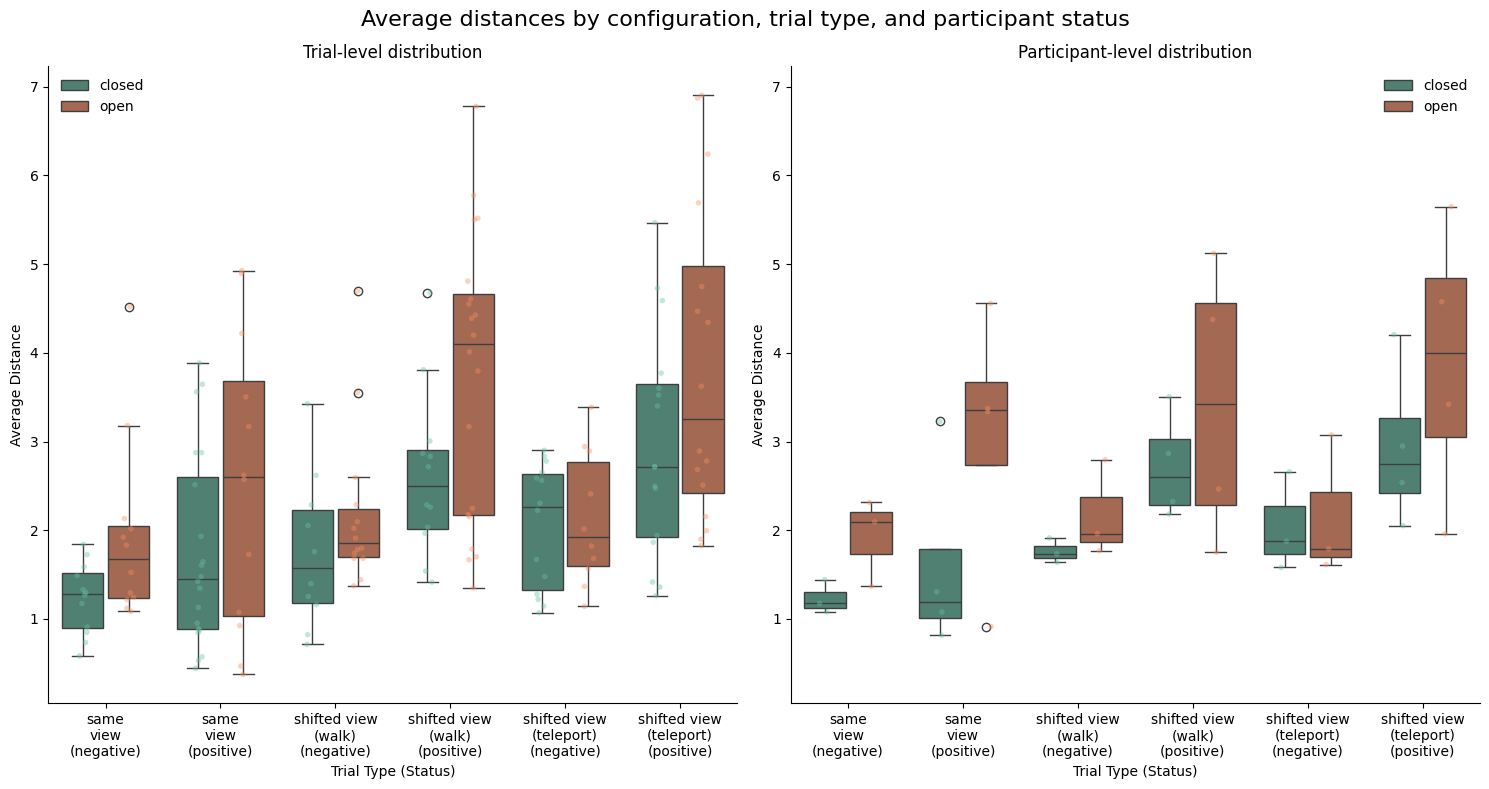

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First calculate trial-level means (since each trial has 4 objects)
trial_means = (all_data_df.groupby(['participant_id', 'trial_num', 'status',
                                   'object_configuration_type', 'trial_type'])['distance']
               .mean()
               .reset_index())

# Then calculate participant-level means
participant_means = (trial_means.groupby(['participant_id', 'status',
                                        'object_configuration_type', 'trial_type'])['distance']
                    .mean()
                    .reset_index())

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Average distances by configuration, trial type, and participant status', fontsize=16)

# Create color palette
config_colors = sns.color_palette("Set2", 2)
darkening_factor = 0.7
darker_config_colors = [(r*darkening_factor, g*darkening_factor, b*darkening_factor) 
                        for r, g, b in config_colors]

# Define orders and labels
config_order = ['closed', 'open']
trial_order = ['WalkEgo', 'WalkAllo', 'Teleport']
status_order = ['negative', 'positive']

# Create compound x-axis labels
trial_type_labels = {
    'WalkEgo': 'same\nview',
    'WalkAllo': 'shifted view\n(walk)',
    'Teleport': 'shifted view\n(teleport)'
}

# Add status to trial_means and participant_means for x-axis ordering
trial_means['trial_status'] = trial_means['trial_type'] + '_' + trial_means['status']
participant_means['trial_status'] = participant_means['trial_type'] + '_' + participant_means['status']

# Create ordered list for x-axis
x_order = [f"{trial}_{status}" for trial in trial_order for status in status_order]
x_labels = [f"{trial_type_labels[trial.split('_')[0]]}\n({trial.split('_')[1]})" 
           for trial in x_order]

# First subplot (trial-level data)
sns.boxplot(data=trial_means,
            x='trial_status',
            y='distance',
            hue='object_configuration_type',
            order=x_order,
            hue_order=config_order,
            palette=darker_config_colors,
            gap=0.1,
            ax=ax1)

sns.stripplot(data=trial_means,
             x='trial_status',
             y='distance',
             hue='object_configuration_type',
             order=x_order,
             hue_order=config_order,
             palette=config_colors,
             dodge=True,
             alpha=0.4,
             size=4,
             legend=False,
             ax=ax1)

ax1.set_xticklabels(x_labels)
ax1.legend(frameon=False)
ax1.set_title('Trial-level distribution')
ax1.set_xlabel('Trial Type (Status)')
ax1.set_ylabel('Average Distance')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Second subplot (participant-level averages)
sns.boxplot(data=participant_means,
            x='trial_status',
            y='distance',
            hue='object_configuration_type',
            order=x_order,
            hue_order=config_order,
            palette=darker_config_colors,
            gap=0.1,
            ax=ax2)

sns.stripplot(data=participant_means,
             x='trial_status',
             y='distance',
             hue='object_configuration_type',
             order=x_order,
             hue_order=config_order,
             palette=config_colors,
             dodge=True,
             alpha=0.4,
             size=4,
             legend=False,
             ax=ax2)

ax2.set_xticklabels(x_labels)
ax2.legend(frameon=False)
ax2.set_title('Participant-level distribution')
ax2.set_xlabel('Trial Type (Status)')
ax2.set_ylabel('Average Distance')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Ensure the y-axes have the same scale
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.tight_layout()

# Save the figure
visualization_output_dir = os.path.join(os.getcwd(), 'output', 'group_visualization')
os.makedirs(visualization_output_dir, exist_ok=True)
filename = os.path.join(visualization_output_dir, 
                       "average_distance_by_configuration_trial_type_and_status.png")
plt.savefig(filename, format='png', dpi=600, bbox_inches='tight', transparent=True)

plt.show()